# Credit EDA Case Study

Problem Statement:Understand how the bank approves and refuses loan. Find out different patterns and represent the outcomes to help the bank reduce the credit risk and interest risk.

### Analysis Approach

Analysis Steps:
- Data Understanding and Exploring
    1. Importing libraries and loading data files
    2. Data inspection
- Data Cleaning and manipulations`
    1. Data Cleaning
    2. Exploring Datatypes and negative values
    3. Imputing null values
    4. Outliers
    5. Binning of variables
- Data Analysis
    1. Imbalance check in Variable Target
    2. Univariate analysis of Categorical and numeric variables
    3. Segmented univariate Analysis
    4. Bivariate Analysis
    5. Multivariate Analysis
    6. Correlation 
- Creating .csv file of analyzed app_data as new_data.csv. This file will be accessed in another jupyter file for further analysis

## 1. Import Libraries

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [3]:
# To visualize

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## 2. Data Loading

In [5]:
# Read data from file application_data.csv

app_data = pd.read_csv("C:/Users/hp/Downloads/application_data.csv")
#app_data = pd.read_csv("application_data.csv")

# Preview the first 5 lines of the application data
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.1 Data Inspection

In [6]:
#Checking the number of rows and columns

app_data.shape

(307511, 122)

In [7]:
#View Summary of all the numeric columns in the dataset

app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#Checking data info

app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [9]:
#Checking Column-wise null count 

app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### 2.2 Data Cleaning & Manipulation

In [10]:
#Checking Percentage of missing values for all columns and storing in a dataframe

missing_values = round(100*(app_data.isnull().sum()/len(app_data.index)),2)
missing_values

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
#Columns with high missing percentage >=50% 

missing_values = missing_values[missing_values >= 50]
missing_values

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [12]:
#Checking number of columns with missing missing percentage >=50%

len(missing_values)

41

In [13]:
#Storing the names of columns in dropped_col and Dropping those columns with missing values more than 50%

dropped_col = ([missing_values[missing_values >=50.00].index])
app_data.drop(labels=dropped_col[0],axis=1,inplace=True)

In [14]:
#Checking the number of rows and columns

app_data.shape

(307511, 81)

In [15]:
# Again Checking how many columns still has missing values and it's percntage
missing_values = round(100*(app_data.isnull().sum()/len(app_data.index)),2)
missing_values

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

##### Observation and Further approach:
Here we have below columns with >40% missing values. As these columns are not very useful for analysis, we can drop them as well.
1 YEARS_BEGINEXPLUATATION_AVG     48.78
2 FLOORSMAX_AVG                   49.76
3 YEARS_BEGINEXPLUATATION_MODE    48.78
4 FLOORSMAX_MODE                  49.76
5 YEARS_BEGINEXPLUATATION_MEDI    48.78
6 FLOORSMAX_MEDI                  49.76
7 TOTALAREA_MODE                  48.27
8 EMERGENCYSTATE_MODE             47.40

Wheras, Column "OCCUPATION_TYPE" has 31.35% missing values, which is quite high to perform imputation. But it is an important variable while doing the analysis, hence we cannot drop the column. If we imupte the missing values with mode value of the columns then resulting analysis will be biased to particular category, which is unfair. Thus, we have decided to keep the missing values as it is.

In [16]:
# Based on column description and percentatge of missing values we are assumping below mentioned columns are not that important for analysis

unwanted = ['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 
            'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [17]:
# Dropping above mentioned columns from dataframe

app_data.drop(labels=unwanted,axis=1,inplace=True)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Checking the shape of dataframe again

app_data.shape

(307511, 44)

In [20]:
# Getting all the remaining column names

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_C

### 2.3 Checking unique values and Data Types of columns

In [21]:
# Exploring Categorical columns in data set

app_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [22]:
# Checking uniques values of Categorical columns in data set
app_data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [23]:
# Exploring numerical columns with datatype float 64

app_data.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#####  Approach
Columns mentioned below:
DAYS_REGISTRATION, CNT_FAM_MEMBERS, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

As we can see here, these columns contains count and value of number of days which should not be in float datatype. Hence, we are converting them into Int dtype

In [24]:
# Changing Data type of some float64 columns to int64 columns

app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype(np.int64, errors='ignore')
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype(np.int64, errors='ignore')
app_data['OBS_30_CNT_SOCIAL_CIRCLE'] = app_data['OBS_30_CNT_SOCIAL_CIRCLE'].astype(np.int64, errors='ignore')
app_data['DEF_30_CNT_SOCIAL_CIRCLE'] = app_data['DEF_30_CNT_SOCIAL_CIRCLE'].astype(np.int64,errors='ignore')
app_data['OBS_60_CNT_SOCIAL_CIRCLE'] = app_data['OBS_60_CNT_SOCIAL_CIRCLE'].astype(np.int64, errors='ignore')
app_data['DEF_60_CNT_SOCIAL_CIRCLE'] = app_data['DEF_60_CNT_SOCIAL_CIRCLE'].astype(np.int64, errors='ignore')
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].astype(np.int64, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype(np.int64, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(np.int64, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_MON'] = app_data['AMT_REQ_CREDIT_BUREAU_MON'].astype(np.int64, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype(np.int64, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(np.int64, errors='ignore')

In [25]:
app_data.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

#### Approach
There are some Flag related columns in int64 datatype. 
'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'
Let's convert them to Categorical i.e. Object datatype. 
Just like we have 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' columns already in categorical form.

In [26]:
#function to convert flag column values 0 and 1 to N and Y respectively
# df is the dataframe, cols will be the list with the names of all the columns to be converted

def convert_to_categorical(df, cols):
    for i in cols:
        df.loc[:,i].replace((0, 1), ('N', 'Y'), inplace=True)
    return df.head()


cols = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

convert_to_categorical(app_data, cols)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,Laborers,1.0,WEDNESDAY,10,N,N,N,N,N,N,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,2.0,MONDAY,11,N,N,N,N,N,N,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,Laborers,1.0,MONDAY,9,N,N,N,N,N,N,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,Laborers,2.0,WEDNESDAY,17,N,N,N,N,N,N,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,Core staff,1.0,THURSDAY,11,N,N,N,N,Y,Y,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Negative values conversion

As we can see from the dataframe values, we have 5 columns which containe information about number of days. But this columns have some negative values which are insignificant. Thus we have to convert them into positive values.

In [28]:
#Checking and converting negative values into positive

app_data[['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH' ]].describe()

,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
count,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000
mean,-4986.120327,-962.858788,-16036.995067,63815.045904,-2994.202373
std,3522.886321,826.808487,4363.988632,141275.766519,1509.450419
min,-24672.000000,-4292.000000,-25229.000000,-17912.000000,-7197.000000
25%,-7479.500000,-1570.000000,-19682.000000,-2760.000000,-4299.000000
50%,-4504.000000,-757.000000,-15750.000000,-1213.000000,-3254.000000
75%,-2010.000000,-274.000000,-12413.000000,-289.000000,-1720.000000
max,0.000000,0.000000,-7489.000000,365243.000000,0.000000


In [29]:
# Converting negative values in above columns to positive

app_data['DAYS_REGISTRATION']=abs(app_data['DAYS_REGISTRATION'])
app_data['DAYS_LAST_PHONE_CHANGE']=abs(app_data['DAYS_LAST_PHONE_CHANGE'])
app_data['DAYS_BIRTH']=abs(app_data['DAYS_BIRTH'])
app_data['DAYS_EMPLOYED']=abs(app_data['DAYS_EMPLOYED'])
app_data['DAYS_ID_PUBLISH']=abs(app_data['DAYS_ID_PUBLISH'])

In [30]:
# Rechecking the column's description

app_data[['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']].describe()

,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
count,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000
mean,4986.120327,962.858788,16036.995067,67724.742149,2994.202373
std,3522.886321,826.808487,4363.988632,139443.751806,1509.450419
min,0.000000,0.000000,7489.000000,0.000000,0.000000
25%,2010.000000,274.000000,12413.000000,933.000000,1720.000000
50%,4504.000000,757.000000,15750.000000,2219.000000,3254.000000
75%,7479.500000,1570.000000,19682.000000,5707.000000,4299.000000
max,24672.000000,4292.000000,25229.000000,365243.000000,7197.000000


In [31]:
app_data.shape

(307511, 44)

##### From above remaining 44 columns, let's check the columns with <19% missing values.
##### These missing values can be imputated using appropriate method based on column type and presence of outliers

In [32]:
# Identifying columns with less than or equal to 19% null values. This null values in columns will be imputed later

list(app_data.columns[(app_data.isnull().mean()<=0.19) & (app_data.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

### 2.4 Metrics To Impute Missing Values

#### AMT_ANNUITY

In [33]:
# Checking for values and counts in 'AMT_ANNUITY'

app_data['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

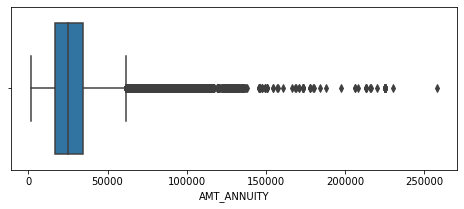

In [34]:
# Since AMT_ANNUITY is a continuous variable. So checking for outliers

plt.figure(figsize=[8,3])
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

As we can see above there are outliers present for "AMT_ANNUITY" which is a very important field to focus on. As Outliers affect the mean value of the data but they have little effect on the median. Hence the null values in the column can be imputed using the median of the column

In [35]:
# Code for null value imputation

imputVAL = round(app_data['AMT_ANNUITY'].median(),2)
print (imputVAL)
app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=imputVAL

24903.0


#### EXT_SOURCE_2

In [36]:
# Checking for values and counts in 'EXT_SOURCE_2'

app_data['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

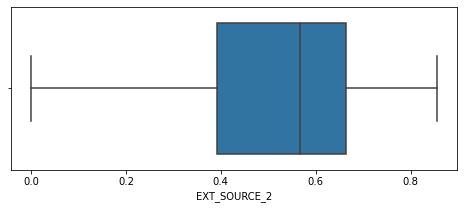

In [37]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers

plt.figure(figsize=[8,3])
sns.boxplot(app_data['EXT_SOURCE_2'])
plt.show()

There are no oulier's present in EXT_SOURCE_2 column.

In [38]:
# Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the column

imputVAL = round(app_data['EXT_SOURCE_2'].mean(),2)
print (imputVAL)
app_data.loc[app_data['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2']=imputVAL

0.51


#### NAME_TYPE_SUITE

In [39]:
# Checking for values and counts in 'NAME_TYPE_SUITE'

app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [40]:
app_data.NAME_TYPE_SUITE.isnull().sum()

1292

The column NAME_TYPE_SUITE is a categorical column and it has 0.42% missing values.So this column can be imputed using the mode of the column

In [41]:
# The column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column

imputVAL = app_data['NAME_TYPE_SUITE'].mode()[0]
print (imputVAL)
app_data.loc[app_data['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']=imputVAL

Unaccompanied


#### AMT_GOODS_PRICE

In [42]:
# Checking for values and counts in 'AMT_GOODS_PRICE'

app_data['AMT_GOODS_PRICE'].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

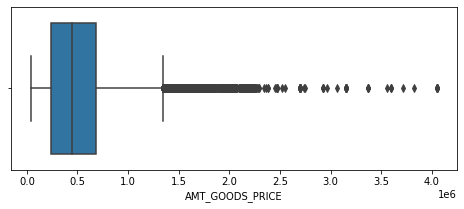

In [43]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers

plt.figure(figsize=[8,3])
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

In [44]:
#Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the column 

imputVAL = round(app_data['AMT_GOODS_PRICE'].median(),2)
print (imputVAL)
app_data.loc[app_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=imputVAL

450000.0


#### CNT_FAM_MEMBERS

In [45]:
# Checking for values and counts in 'CNT_FAM_MEMBERS'

app_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

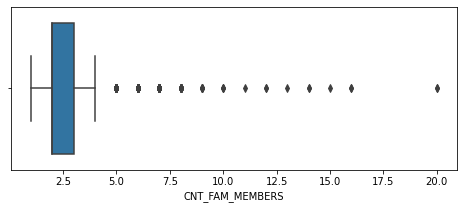

In [46]:
# Checking for outliers using box-plot
plt.figure(figsize=[8,3])
sns.boxplot(app_data['CNT_FAM_MEMBERS'])
plt.show()

As we can see above there are outliers present for "CNT_FAM_MEMBERS". As Outliers affect the mean value of the data but they have little effect on the median. Hence the null values in the column can be imputed using the median of the column

In [47]:
# Imputing with median value

app_data['CNT_FAM_MEMBERS'].fillna(round(app_data.CNT_FAM_MEMBERS.median()), inplace = True)

#### AMT_REQ_CREDIT_BUREAU_YEAR*

In [48]:
# Checking values in column AMT_REQ_CREDIT_BUREAU_YEAR

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

### Approach:

AMT_REQ_CREDIT_BUREAU_HOUR    13.5    
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5

For this columns we have 13.5% of missing values. This 6 columns represents "Number of enquiries to Credit Bureau about the client" one hour, one day, one week, one month etc. before application.
The missing values in this columns can be imputed with mean or median which is coming to be approx 0
Thus, Here we can say that there were no inquiries done for these people to Credit Bureau. 
But median value for AMT_REQ_CREDIT_BUREAU_YEAR is coming as 1, which might miss lead. So, we are not imputing this column

In [49]:
#Checking median valuess 
m1 = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
m2 = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()
m3 = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
m4 = app_data['AMT_REQ_CREDIT_BUREAU_MON'].median()
m5 = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()
m6 = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

print('Hour:',m1,'Day:', m2,'Week:', m3,'Mon:', m4,'Qrt:', m5,'Year:', m6)

Hour: 0.0 Day: 0.0 Week: 0.0 Mon: 0.0 Qrt: 0.0 Year: 1.0


In [50]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace = True)

In [51]:
#Checking columns again to seee which columns with less than or equal to 19% null values are not yet treated
list(app_data.columns[(app_data.isnull().mean()<=0.19) & (app_data.isnull().mean()>0)])

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

For time being we are not treating the missing values of below 4 columns with 0.33% Missing values as thy will not be impacting on our analysis
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33

#### DAYS_LAST_PHONE_CHANGE

In [52]:
# Checking column values

app_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

0.0       37672
1.0        2812
2.0        2318
3.0        1763
4.0        1285
          ...  
3558.0        1
3978.0        1
3701.0        1
3809.0        1
3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

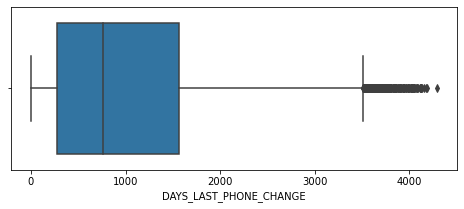

In [53]:
#Plot for Checking for outliers in column to decide value in place of null

plt.figure(figsize=[8,3])
sns.boxplot(app_data.DAYS_LAST_PHONE_CHANGE)
plt.show()

In [54]:
# Checking median value

app_data.DAYS_LAST_PHONE_CHANGE.median()

757.0

In [55]:
# AS outliers are present Hence, here we are using median to fill null values

app_data['DAYS_LAST_PHONE_CHANGE'].fillna(app_data.DAYS_LAST_PHONE_CHANGE.median(), inplace = True)

In [56]:
# Cros checking null values of this column

100*app_data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [57]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_C

In [58]:
# Diving by 7 gives us "WEEKS_EMPLOYED" from "DAYS_EMPLOYED", weeks seems appropriate for this column

app_data.DAYS_EMPLOYED = abs((app_data.DAYS_EMPLOYED)//7)

In [59]:
# Renaming the column as per weeks data
app_data.rename(columns = {'DAYS_EMPLOYED':'WEEKS_EMPLOYED'}, inplace = True)

### 2.5 Detecting Outliers

#### AMT_INCOME_TOTAL

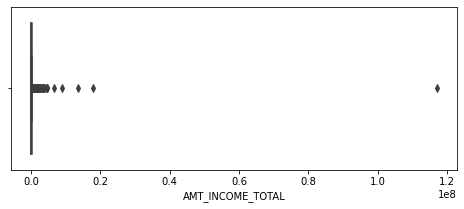

In [60]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers

plt.figure(figsize=[8,3])
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

AMT_INCOME_TOTAL tells us about the income of the client. It is clearly visible that the value of 1.2 is an outlier.

#### DAYS_BIRTH

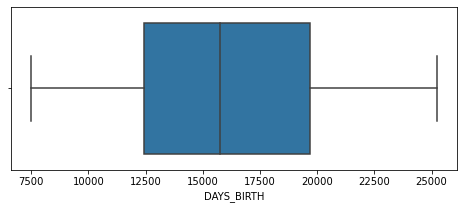

In [61]:
# boxplot for 'DAYS_BIRTH' column to check the outliers
plt.figure(figsize=[8,3])
sns.boxplot(app_data.DAYS_BIRTH)
plt.show()

There are No Outliers in the column DAYS_BIRTH

#### DAYS_REGISTRATION

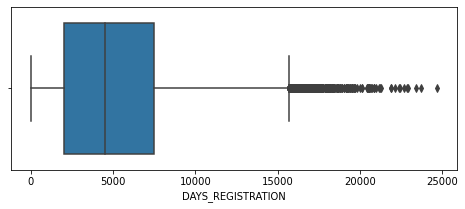

In [62]:
# boxplot for 'DAYS_REGISTRATION' column to check the outliers
plt.figure(figsize=[8,3])
sns.boxplot(app_data.DAYS_REGISTRATION)
plt.show()

DAYS_REGISTRATION telss us how many days before the application did client change his registration. 
From the box plot, we observe a value which is greater that 24000 which is surely an outlier.

#### CNT_FAM_MEMBERS

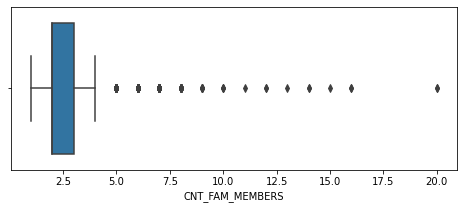

In [63]:
# Checking for outliers in CNT_FAM_MEMBERS Column using Box-Plot
plt.figure(figsize=[8,3])
sns.boxplot(app_data['CNT_FAM_MEMBERS'])
plt.show()

CNT_FAM_MEMBERS tells us How many family members does client have. 
From above box plot, we can observe that it has detected some outliers in the data and maximum family member's count is 20, which is very rare but it cannot be considered as a outlier.

### 2.6 Errors In Data

#### There are some columns where the value is mentioned as 'XNA' which means 'Not Available'

In [64]:
# For Gender column
app_data[app_data['CODE_GENDER']=='XNA'].shape

(4, 44)

In [65]:
# For Organization column
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 44)

So, there are 4 rows from Gender column and 55374 rows from Organization type column

In [66]:
# Describing the Gender column to check the number of females and males
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [67]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [68]:
app_data['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True) #to make it more presentable
app_data['CODE_GENDER'].value_counts()

Female    202452
Male      105059
Name: CODE_GENDER, dtype: int64

In [69]:
# Dropping the rows of total 55374 have 'XNA' values in the organization type column
app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 44)

## 3. Derived Metrics

### 3.1 Binning variables for analysis

In [70]:
#Binning AMT_INCOME_TOTAL
app_data['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        90000.0
0.3       121500.0
0.6       180000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [71]:
#Creating a new categorical variable based on total income
app_data['INCOME_RANGE']=pd.qcut(app_data['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [72]:
#Binning AMT_CREDIT
app_data['AMT_CREDIT'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0      45000.0
0.1     180000.0
0.3     315000.0
0.6     630000.0
0.8     904500.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

In [73]:
#Creating a new categorical variable based on total income
app_data['CREDIT_RANGE']=pd.qcut(app_data['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [74]:
#Binning DAYS_BIRTH
abs(app_data['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10051.0
0.3    12365.0
0.6    15679.0
0.8    18267.8
1.0    25200.0
Name: DAYS_BIRTH, dtype: float64

In [75]:
#Creating a column AGE using DAYS_BIRTH
app_data['AGE']=app_data['DAYS_BIRTH']//365.25

In [76]:
app_data['AGE'].describe()

count    252137.000000
mean         39.934774
std          10.025779
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          68.000000
Name: AGE, dtype: float64

In [77]:
#Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
app_data['AGE_GROUP'] = pd.cut(app_data['AGE'],bins=np.arange(20,71,5))

In [78]:
# Binning AMT_ANNUITY column
# Using cut instead q cut to get equally spaced bins
app_data.loc[:,'ANNUITY_RANGE'] = pd.cut(app_data.AMT_ANNUITY, bins = 5,
                                   labels = ['VeryLow','Low','Medium','High','VeryHigh'], precision = 0).astype('str')
app_data.ANNUITY_RANGE.value_counts(normalize = True)*100

VeryLow     94.480778
Low          5.376839
Medium       0.120173
VeryHigh     0.012692
High         0.009519
Name: ANNUITY_RANGE, dtype: float64

In [79]:
# Binning AMT_GOODS_PRICE column
# Using cut instead q cut to get equally spaced bins
app_data['GOODS_PRICE_RANGE'] = pd.cut(app_data.AMT_GOODS_PRICE, bins = 5,
                                   labels = ['VeryLow','Low','Medium','High','VeryHigh'], precision = 0).astype('str')
app_data.ANNUITY_RANGE.value_counts(normalize = True)*100

VeryLow     94.480778
Low          5.376839
Medium       0.120173
VeryHigh     0.012692
High         0.009519
Name: ANNUITY_RANGE, dtype: float64

In [80]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_GROUP,ANNUITY_RANGE,GOODS_PRICE_RANGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,91,3648,2120,Laborers,1.0,WEDNESDAY,10,N,N,N,N,N,N,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,High,High,25,"(20, 25]",VeryLow,VeryLow
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,169,1186,291,Core staff,2.0,MONDAY,11,N,N,N,N,N,N,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,45,"(40, 45]",VeryLow,Low
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,32,4260,2531,Laborers,1.0,MONDAY,9,N,N,N,N,N,N,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,VeryLow,52,"(50, 55]",VeryLow,VeryLow
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,434,9833,2437,Laborers,2.0,WEDNESDAY,17,N,N,N,N,N,N,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,NaN,Medium,Medium,52,"(50, 55]",VeryLow,VeryLow
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,434,4311,3458,Core staff,1.0,THURSDAY,11,N,N,N,N,Y,Y,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,54,"(50, 55]",VeryLow,VeryLow


In [81]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'WEEKS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_

## 4. Imbalance in TARGET variable

In [82]:
# Checking for Imbalance in 'TARGET'

app_data.TARGET.value_counts(normalize = True)*100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

From above value counts, we can say that TARGET column has 8.65% of 1's which means approx 9% clients have payment difficulties and 91.34% are having no difficulties

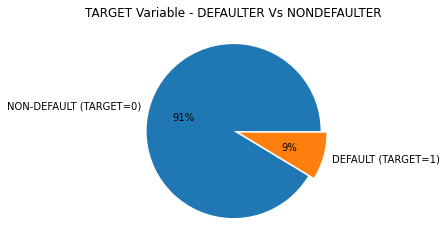

In [83]:
plt.pie(app_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.07),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

It is clear that there is an imbalance between people who defaulted and who didn't default. More than 91% of people are non-defaulters as opposed to 9% who defaulted.

In [86]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_app_data=app_data.loc[app_data["TARGET"]==0]
target1_app_data=app_data.loc[app_data["TARGET"]==1]

In [87]:
# Calculating Imbalance percentage   
# Since the majority is target0 and minority is target1

round(len(target0_app_data)/len(target1_app_data),2)

10.55

The Imbalance ratio is 10.55

In [88]:
target0_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_GROUP,ANNUITY_RANGE,GOODS_PRICE_RANGE
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,169,1186,291,Core staff,2.0,MONDAY,11,N,N,N,N,N,N,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,45,"(40, 45]",VeryLow,Low
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,32,4260,2531,Laborers,1.0,MONDAY,9,N,N,N,N,N,N,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,VeryLow,52,"(50, 55]",VeryLow,VeryLow
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,434,9833,2437,Laborers,2.0,WEDNESDAY,17,N,N,N,N,N,N,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,NaN,Medium,Medium,52,"(50, 55]",VeryLow,VeryLow
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,434,4311,3458,Core staff,1.0,THURSDAY,11,N,N,N,N,Y,Y,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,54,"(50, 55]",VeryLow,VeryLow
5,100008,0,Cash loans,Male,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,226,4970,477,Laborers,2.0,WEDNESDAY,16,N,N,N,N,N,N,Other,0.354225,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,Low,Low,46,"(45, 50]",VeryLow,VeryLow


## 5. Data Analysis

### 5.1 Univariate analysis of Target 0 and Target 1

#### 5.1.1. Categorical Variables

In [89]:
# function to count plot for categorical variables
def count_plot(col):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=col, data=target0_app_data,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {col} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right", size = 15)
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        #ax1.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50), size=15)
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(target0_app_data))*100), (p.get_x()+0.1, p.get_height()+50), size=15)
        
    sns.countplot(x=col, data=target1_app_data,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {col} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right", size = 15)
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        #ax2.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50), size=15)
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(target1_app_data))*100), (p.get_x()+0.1, p.get_height()+50), size=15)
    
    plt.show()

#### Age_Group

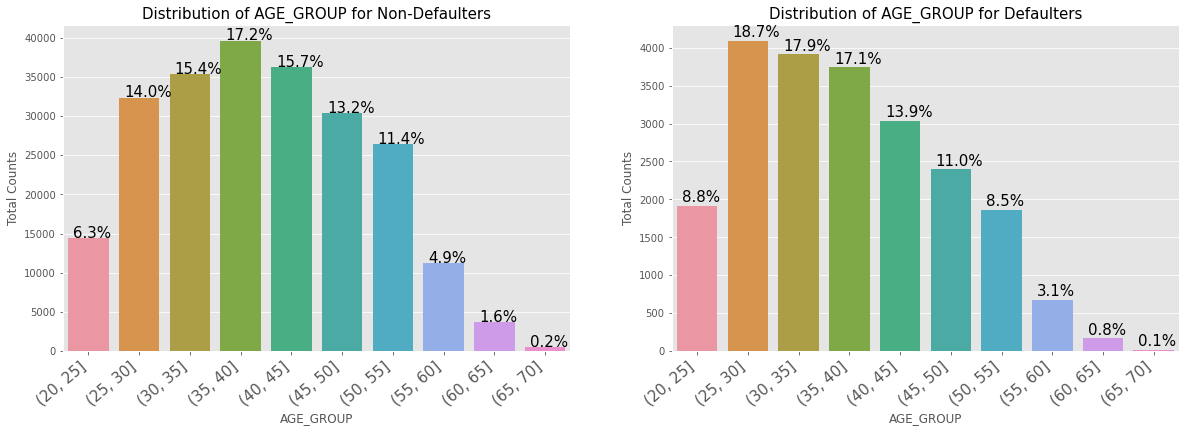

In [90]:
count_plot('AGE_GROUP')

From the graphs of AGE_GROUP for Target-0 (Non-defaulters) and Target-1(Defailters) we can say that:
1. Age-group of 35-40 has higher percentage of being a non-defaulter (around 17.2%) among the other age groups. It might be possible considering, at this age most people are well settled in their life and earning enough to pay the loan amount on time.
2. From the plot for target-1 data, we can see that the Age-group of 25-30 has higher percentage oof becoming a defaulter (around 18.7%) as compared to other age groups.

Thus, We can observe that customers belonging to age group 30-40 are able to make payment on time and can be considered while lending loan. We can also consider age group of 40 to 55, as they contribute more to non-defaulters.

#### CODE_GENDER

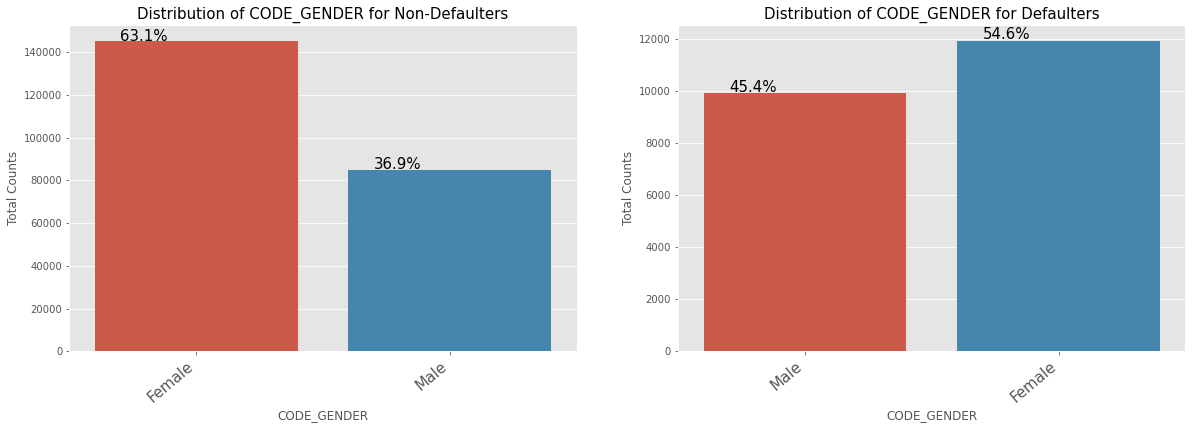

In [91]:
count_plot('CODE_GENDER')

From the graph, we can see that:

1. Female contribute more to the non-defaulters as compared to the defaulters.
2. Number of females applying for loan than males is greater and hence the more number of female defaulters as well.
3. But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.

#### NAME_INCOME_TYPE

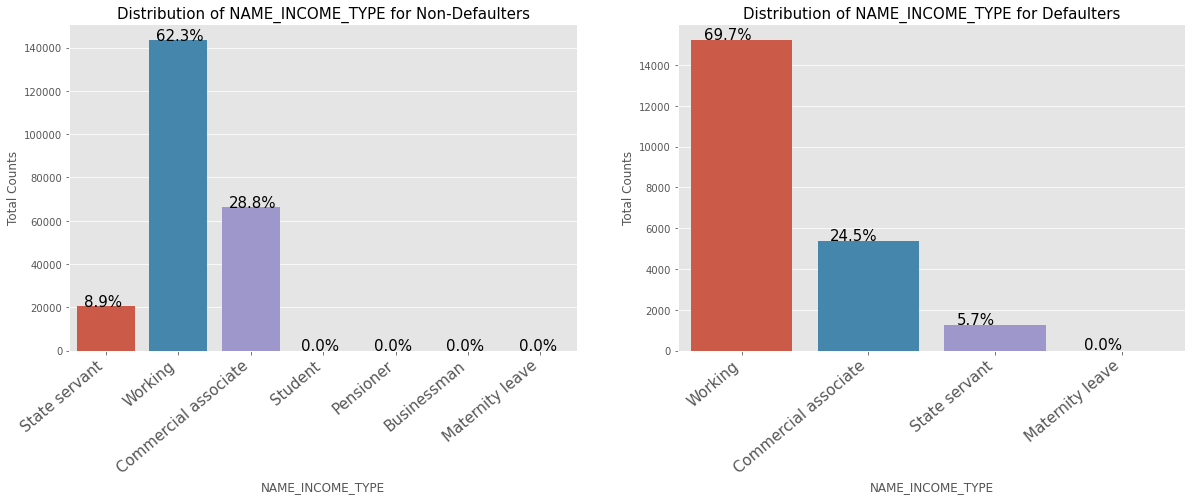

In [92]:
count_plot('NAME_INCOME_TYPE')

From the graph and above count data, we can see that:

1. The students don't default. The reason could be they are not required to pay during the time they are students.
2. Also the Businessmen never default.
3. Most of the loans are distributed to working class people.
4. Working class people contribute less to non-defaulters as compared to the defaulters. So the chances of defaulting are more in their case.

In [93]:
# Verifying value counts of NAME_INCOME_TYPE variable for defaulters and non-defaulters data
t1 = target1_app_data.NAME_INCOME_TYPE.value_counts()
t2 = target0_app_data.NAME_INCOME_TYPE.value_counts()
print('Non-default: ', t2)
print('Defaulter: ', t1)

Non-default:  Working                 143550
Commercial associate     66257
State servant            20454
Student                     18
Pensioner                   10
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64
Defaulter:  Working                 15224
Commercial associate     5360
State servant            1249
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64


#### INCOME_RANGE

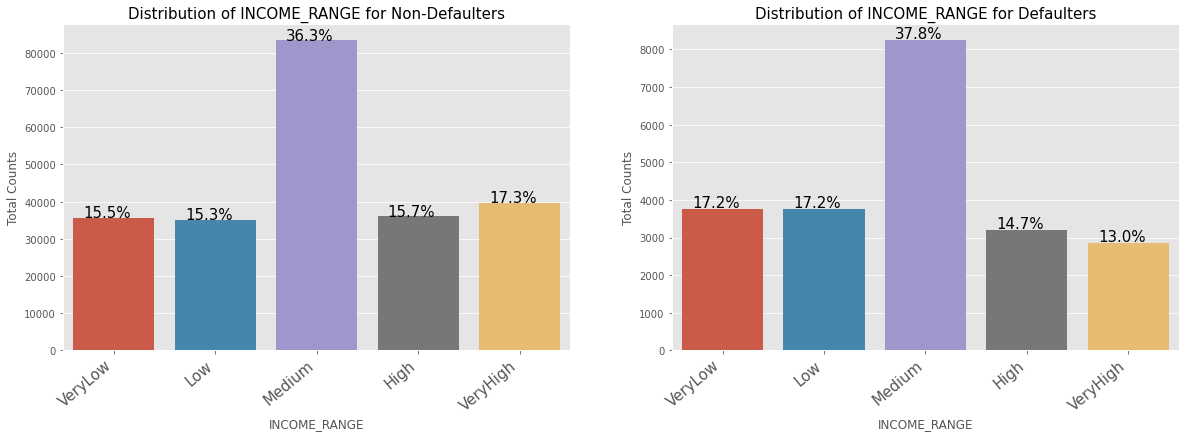

In [94]:
count_plot('INCOME_RANGE')

Low income range has higher defaults as their proportion in defaulted population is higher than in the non defaulted population

#### ANNUITY_RANGE

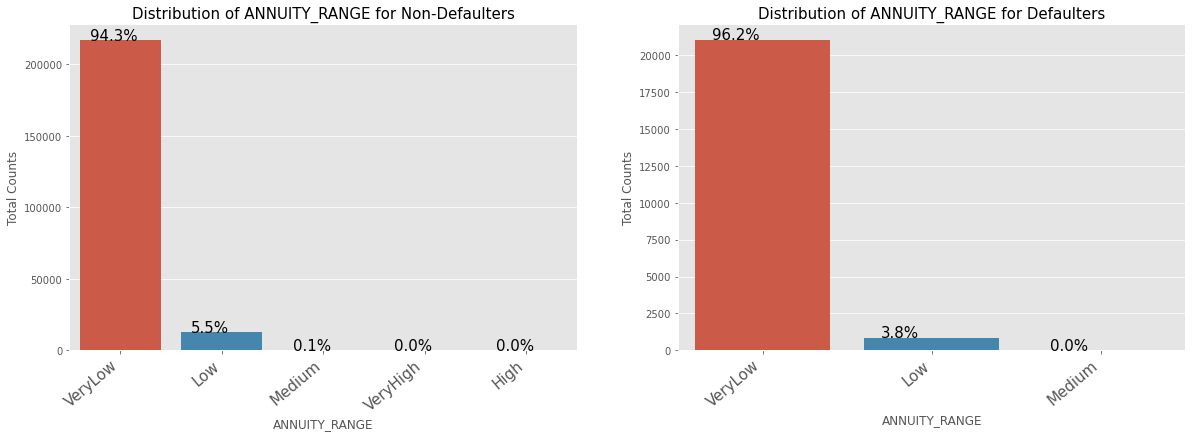

In [95]:
count_plot('ANNUITY_RANGE')

'High' Annuity Range have slightly lower Defaults.

#### NAME_FAMILY_STATUS

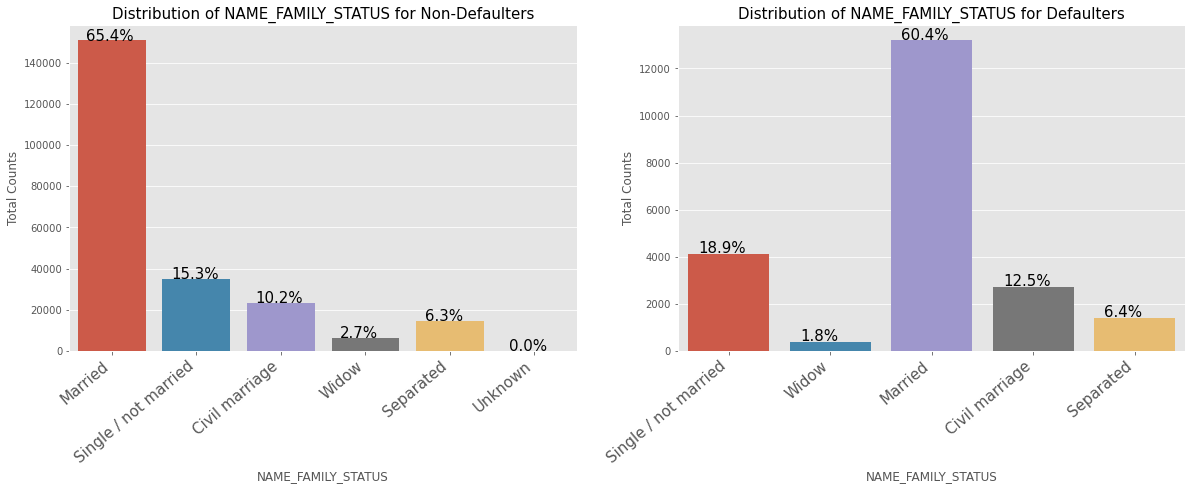

In [96]:
count_plot('NAME_FAMILY_STATUS')

From the graph, we can see that:
    
1. Married people tend to apply for more loans as compared to others.
2. Single/non Married people contribute more to the Defaulters as compared to Non-Defaulters. So the chances of defaulting are more in their case.
3. Widow is less likely to delay/default

#### NAME_HOUSING_TYPE

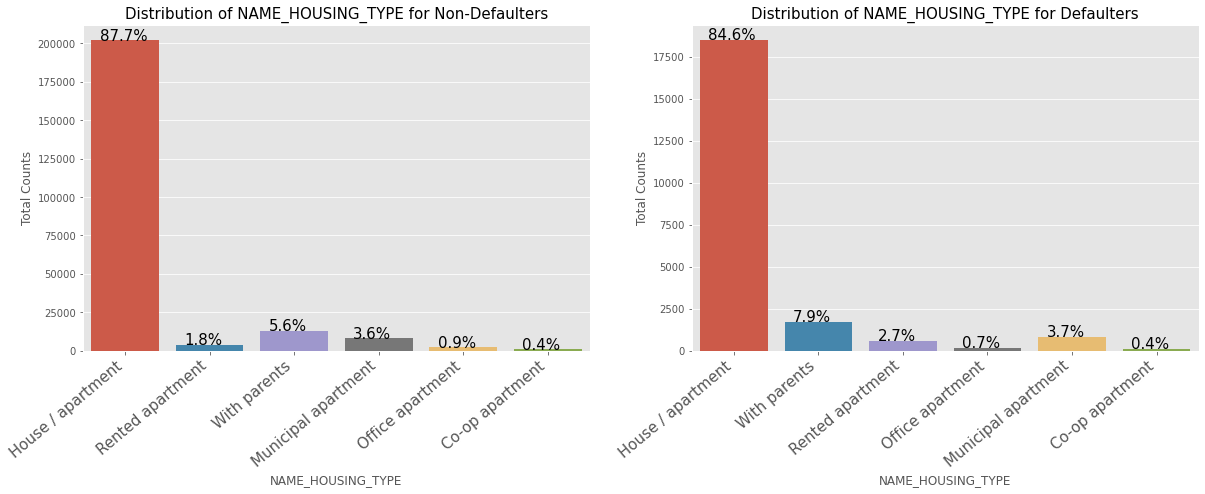

In [97]:
count_plot('NAME_HOUSING_TYPE')

From the graph, we can see that:

1. People who have House/Apartment tend to apply for more loans and tend to default as well.
2. People living with parents tend to default more often when compared with others.

#### FLAG_OWN_CAR

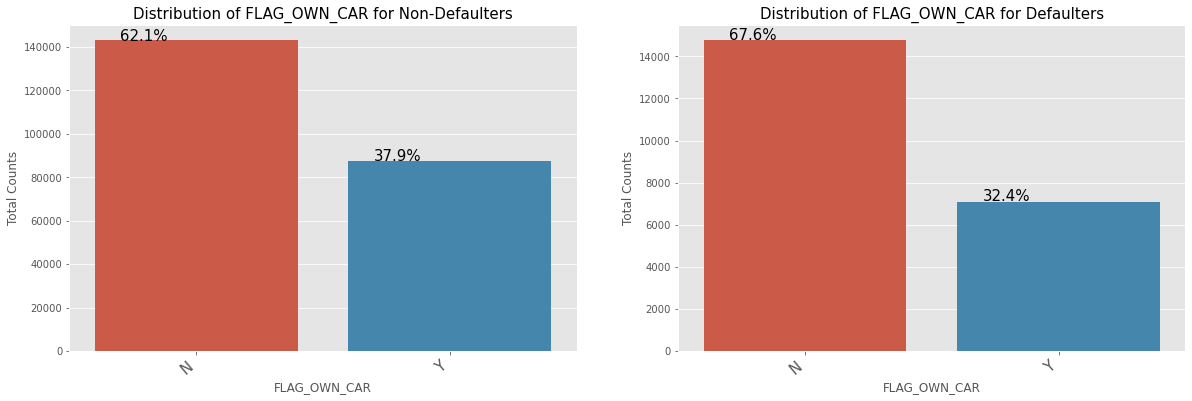

In [98]:
count_plot('FLAG_OWN_CAR')

From the graph, we can see that:
1. The car ownership proportion in the Non-Defaulters graph is higher than the Defaulters graph.
2. We can say that Car Owners are less likely to Default.
3. Not much can be said about the Non Owners as they are almost similarly proportioned.

#### FLAG_OWN_REALTY

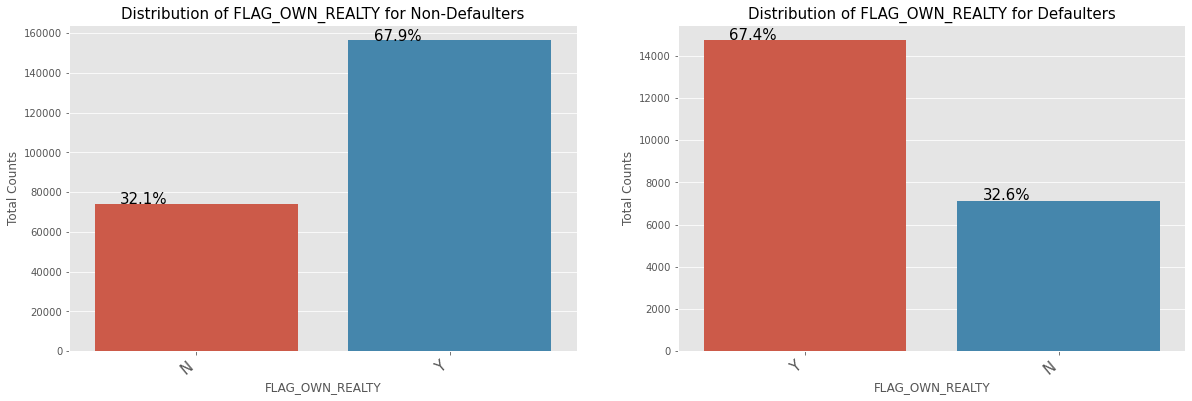

In [99]:
count_plot('FLAG_OWN_REALTY')

The distribution in both these graphs are almost same, so we cannot infer much from this plot.

#### CREDIT_RANGE

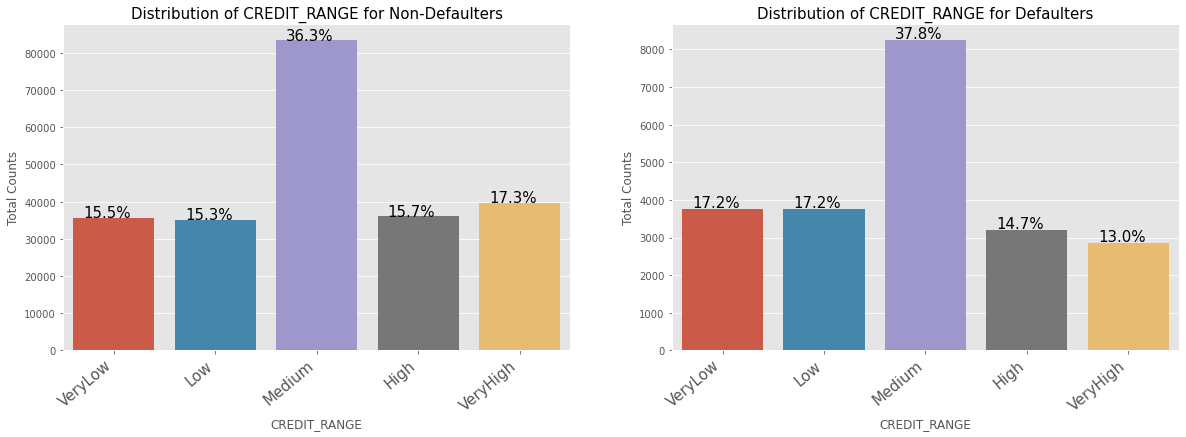

In [100]:
count_plot('CREDIT_RANGE')

From the plot we can say that:
1. Customers with less credit range and most likely to make payment considering total count. 
2. Customers having medium and high credit can also be considered while lending the loan.
3. Very high value loans are less likely to be defaulted, this may be because such loans are availed by High Income Individuals.
4. Very low value loans are also less likely to be defaulted as the lower value makes it easier for the client to repay.

#### NAME_EDUCATION_TYPE

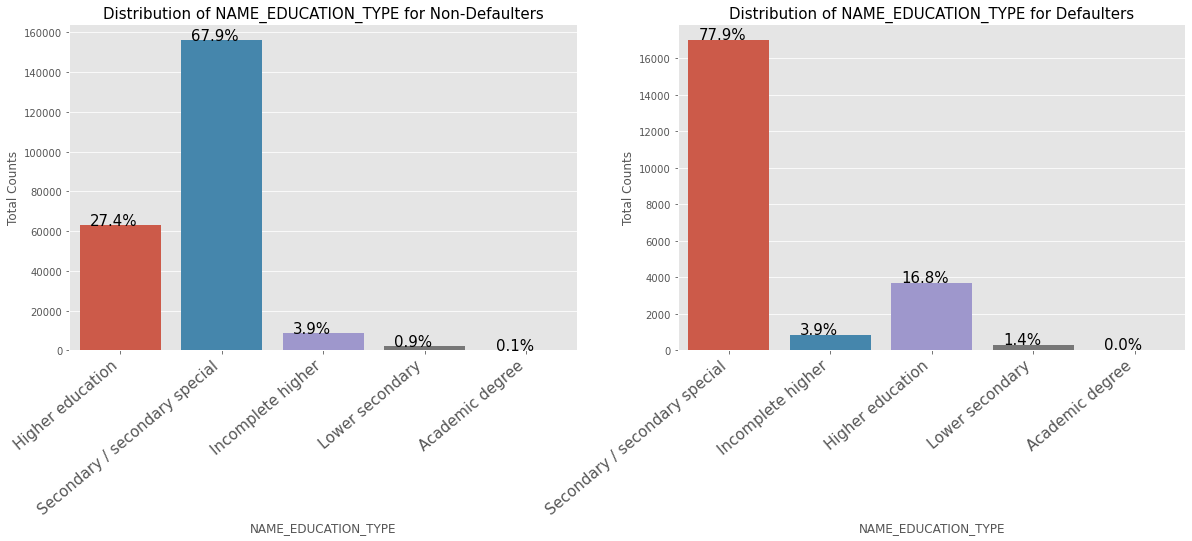

In [101]:
count_plot('NAME_EDUCATION_TYPE')

From the graph, we can conclude that:

1. There are less non-defaulters for education type 'Secondary/Secondary Special' as compared to defaulters.
2. Same goes for education type 'Higher Education' too. Reason can be that they are much educated and can pay the loan on time.

#### NAME_CONTRACT_TYPE

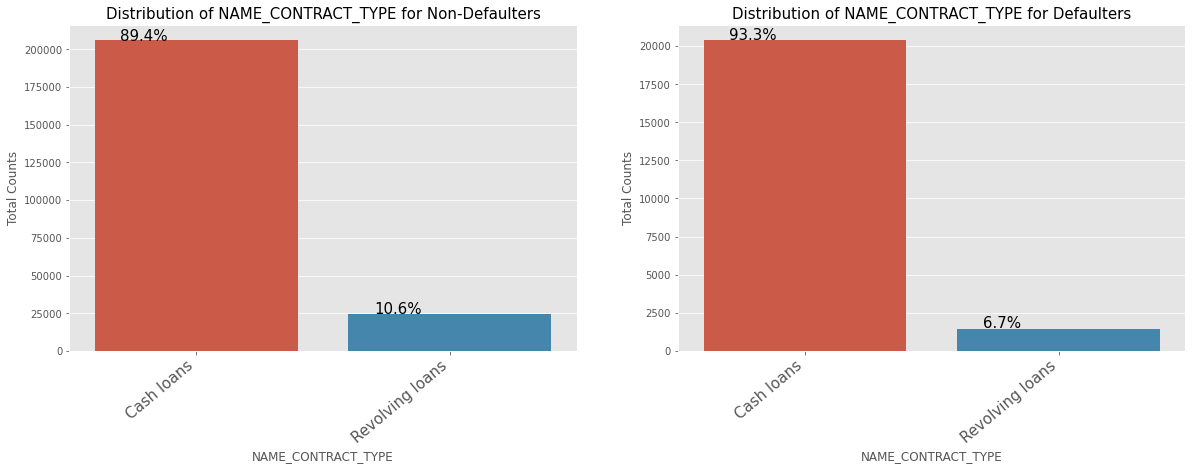

In [102]:
count_plot('NAME_CONTRACT_TYPE')

From the plot we can say that:
1. As we can see number of Defaults on Revolving loans is lesser.
2. In a Revolving loan the borrower has the flexibility to draw down or withdraw, repay, and withdraw again. Thus, allows clients to pay on time while simultaneously being safer for the bank.
3. The Graphs for Cash loans are almost equal in both Defaults and Non-Defaults category, so no valuable insights can be drawn.

#### OCCUPATION_TYPE

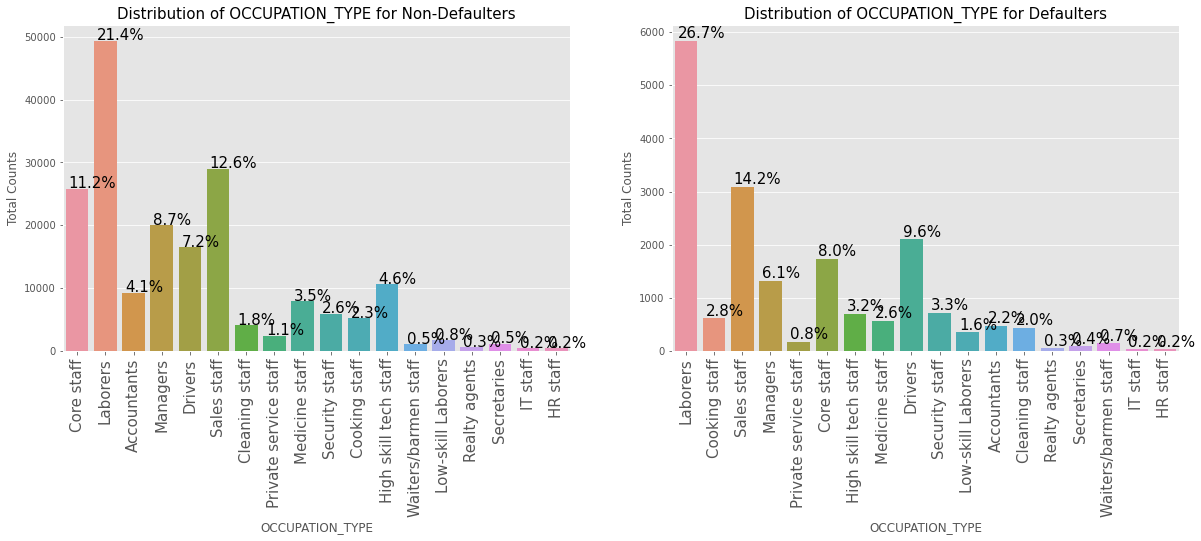

In [103]:
plt.style.use('ggplot')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
sns.countplot(x = target0_app_data.OCCUPATION_TYPE, data=target0_app_data,ax=ax1)
ax1.set_ylabel('Total Counts')
ax1.set_title('Distribution of OCCUPATION_TYPE for Non-Defaulters',fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="center", size = 15)
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(target0_app_data))*100), (p.get_x()+0.1, p.get_height()+50), size=15)
        
sns.countplot(x = target1_app_data.OCCUPATION_TYPE, data=target1_app_data,ax=ax2)
ax2.set_ylabel('Total Counts')
ax2.set_title('Distribution of OCCUPATION_TYPE for Defaulters',fontsize=15)    
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="center", size = 15)
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(target1_app_data))*100), (p.get_x()+0.1, p.get_height()+50), size=15)
    
plt.show()

From above plot we can say that,
1. Labourers are most likely to make payment on time as compared to other non-defaulter occupation types considering total count.
2. Whereas HR staff and IT staff seems to be less likely to make payment on time as compared to other occupations

#### ORGANIZATION_TYPE

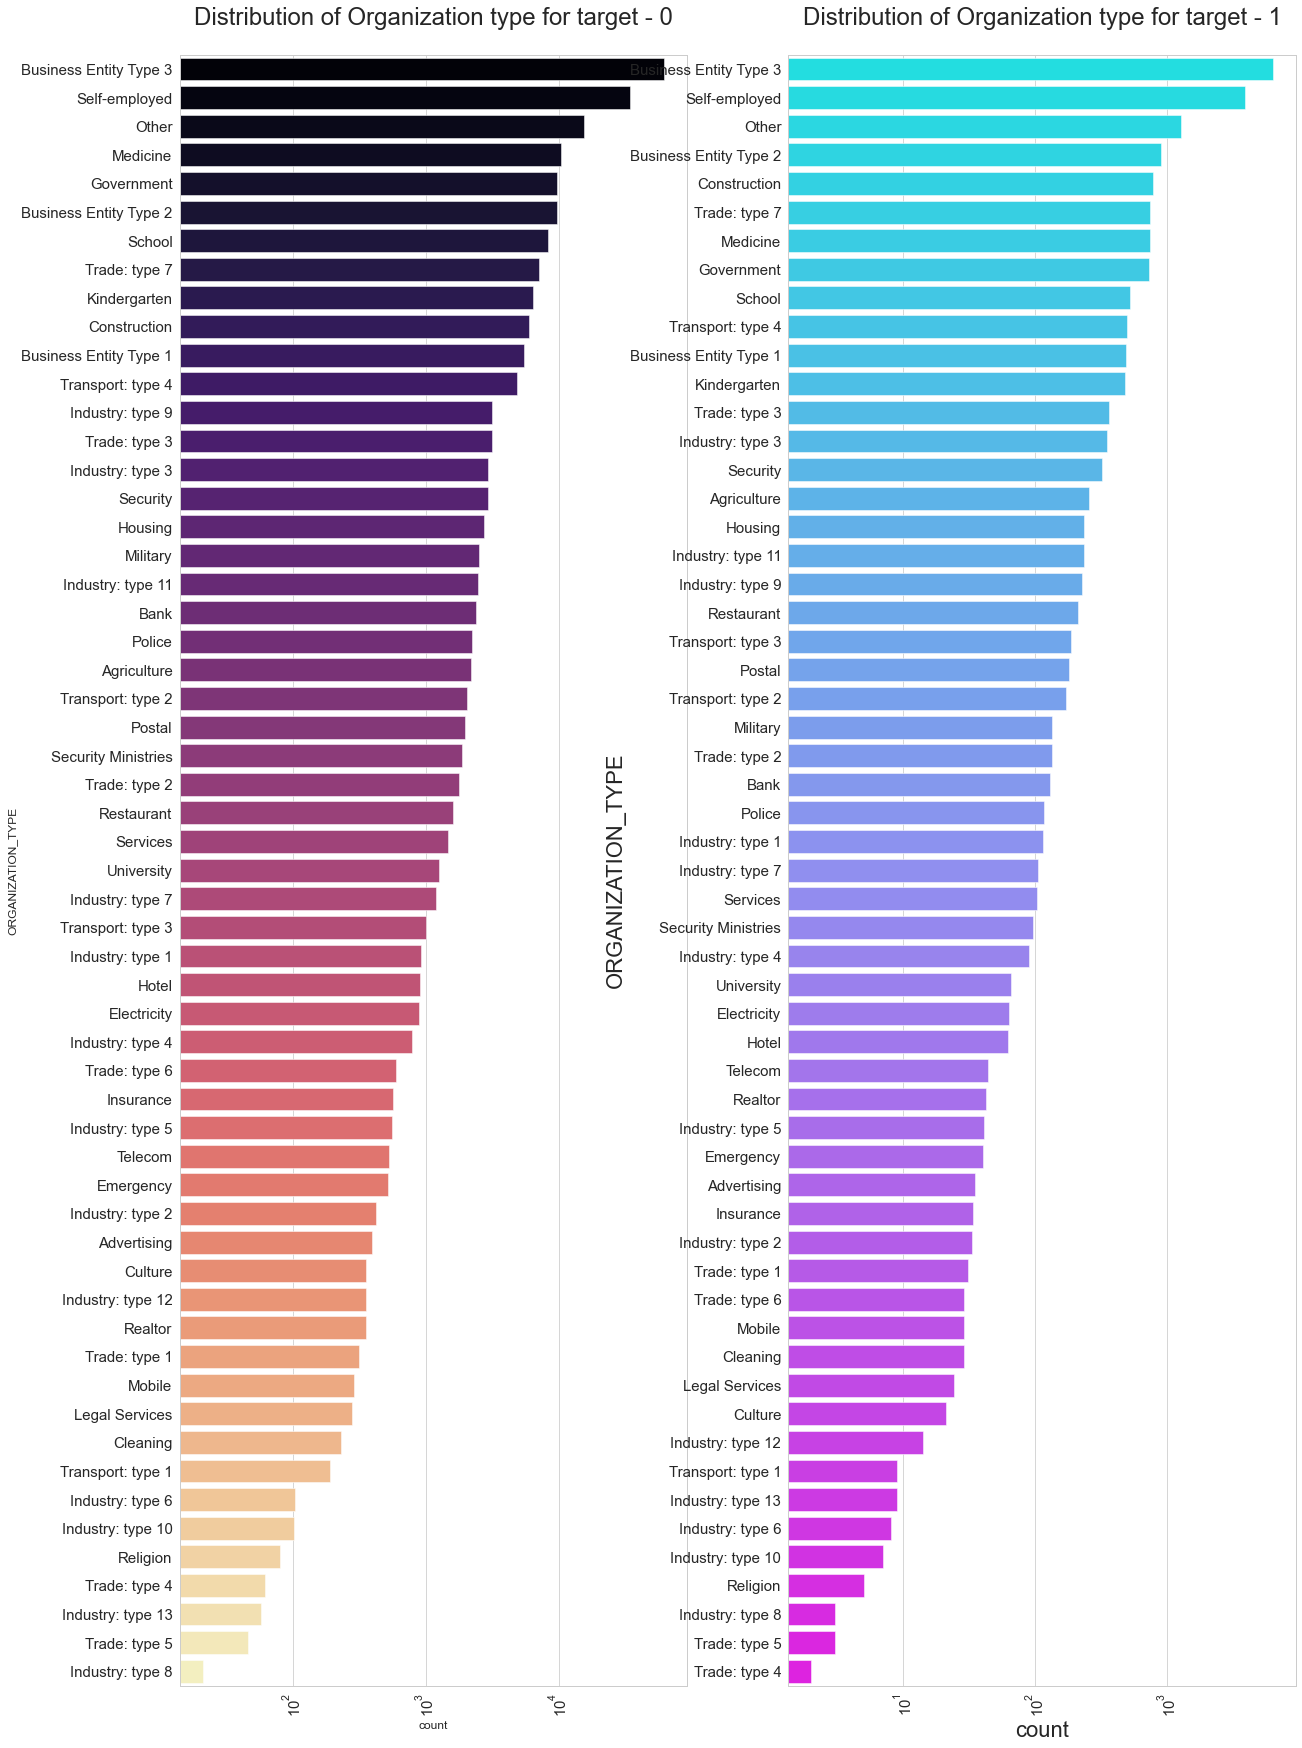

In [104]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')

plt.figure(figsize=(20,30))

plt.subplot(1,2,1)
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xscale('log')

sns.countplot(data=target0_app_data,y='ORGANIZATION_TYPE',order=target0_app_data['ORGANIZATION_TYPE'].value_counts().index,palette='magma')

plt.subplot(1,2,2)

plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xscale('log')

sns.countplot(data=target1_app_data,y='ORGANIZATION_TYPE',order=target1_app_data['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph for non-defaulters (Target-0)

1. Clients which have applied for loans are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

Points to be concluded from the above graph for defulters (Target-1)

1. Clients which have applied for loans are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Business entity Type 2’ and ‘Construction’.
2. Less clients are from Industry type 8, type 6, type 10, religion and trade type 5, type 4.

No further insights can be drawn from this plot

#### 5.1.2 Segmented univariate analysis of Target 0 and Target 1

In [105]:
# Further analysis with respect to Gender
def cnt_plot(col,hue =None):
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)

    plt.title(f'Distribution of {col} for Non-Defaulters',fontsize=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    sns.countplot(data = target0_app_data, x= col, order=target0_app_data[col].value_counts().index,hue = hue,palette='pastel') 
    plt.legend(fontsize=15)
    
    plt.subplot(1,2,2)
    plt.title(f'Distribution of {col} for Defaulters',fontsize=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    sns.countplot(data = target1_app_data, x= col, order=target1_app_data[col].value_counts().index,hue = hue,palette='pastel')
    plt.legend(fontsize=15)
    
    plt.show()

#### Credit_Range and Code_Gender

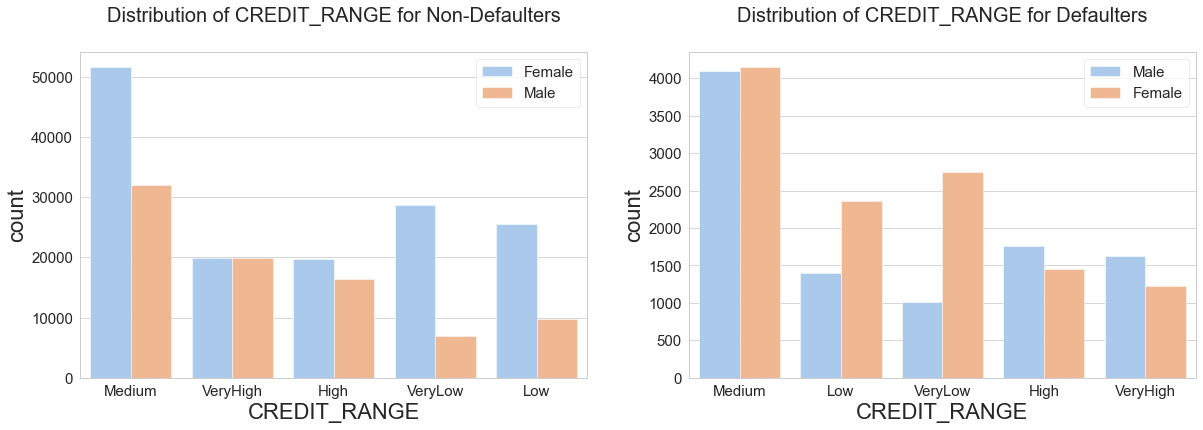

In [106]:
# PLotting for Credit range

cnt_plot(col='CREDIT_RANGE',hue='CODE_GENDER')

Points to be concluded from the above graph. (Target 0)

1. Credit Range 'Medium' is having more number of credits.
2. This graph show that count of females are more than males in having credits for that range.

Points to be concluded from the above graph. (Target 1)

1. Credit Range 'Medium' is having more number of credits and both male and female gender count is quite similar for Medium credit range
2. For High and Very high credit range,count of male gender being defaulter is more as compared to FEmales.
3. Whereas if Credit range is between verylow and low, Females tend to default more than Males. Significant difference can be observed here.

#### Income_Range and Code_Gender

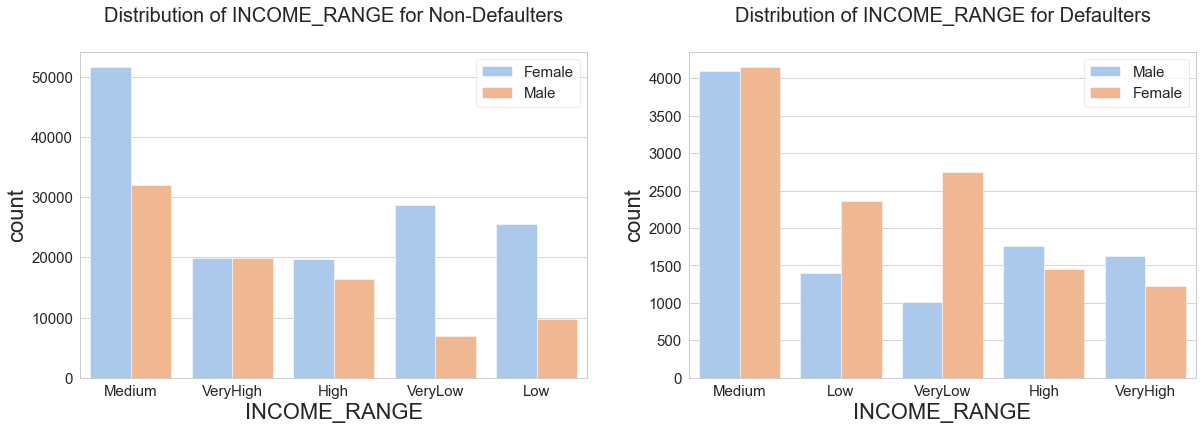

In [107]:
# PLotting for income range

cnt_plot(col='INCOME_RANGE',hue='CODE_GENDER')


Points to be concluded from the above graph. (Target 0)

1. Female counts are higher than male i.e, females with variable income ranges tend to pay the amount with no difficulties and become non-defaulters
2. Whereas, count of males becoming non-defaulter with similar income ranges is less

Points to be concluded from the above graph. (Target 1)

1. Male counts are higher for higher income range.
2. Income group 'Medium' is having more number of male and female defaulter customer.

#### Name_Income_Type and Code_Gender

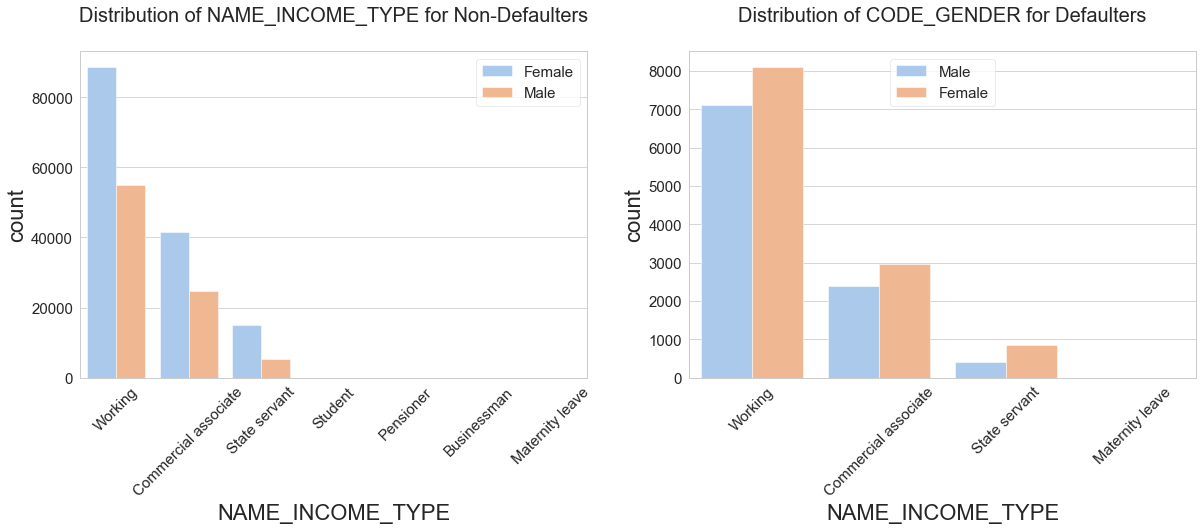

In [108]:
# Plotting for Income type

sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

plt.title('Distribution of NAME_INCOME_TYPE for Non-Defaulters',fontsize=20)
plt.xticks(rotation = 45, size = 15)
plt.yticks(size = 15)
sns.countplot(data = target0_app_data, x= 'NAME_INCOME_TYPE', order=target0_app_data['NAME_INCOME_TYPE'].value_counts().index, hue='CODE_GENDER',palette='pastel') 
plt.legend(fontsize=15)
    
plt.subplot(1,2,2)
plt.title('Distribution of CODE_GENDER for Defaulters',fontsize=20)
plt.xticks(rotation = 45, size = 15)
plt.yticks(size = 15)
sns.countplot(data = target1_app_data, x= 'NAME_INCOME_TYPE', order=target1_app_data['NAME_INCOME_TYPE'].value_counts().index, hue='CODE_GENDER', palette='pastel')
plt.legend(fontsize=15)
    
plt.show()

#cnt_plot(col='NAME_INCOME_TYPE',hue='CODE_GENDER')

Points to be concluded from the above graph. (Target 0)

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ we have higher number of Females who are paying payment on time as compared to Males who belng to same Income type.
2. Less number of peeple seems to be applyig for loan with income types ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

Points to be concluded from the above graph. (Target 1)

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of counts is higher than other.
2. For this Females are having higher number of being a defaulter.
3. Less number of people becoming defaulter for income type ‘Maternity leave’.

#### Name_Contract_Type and Code_Gender

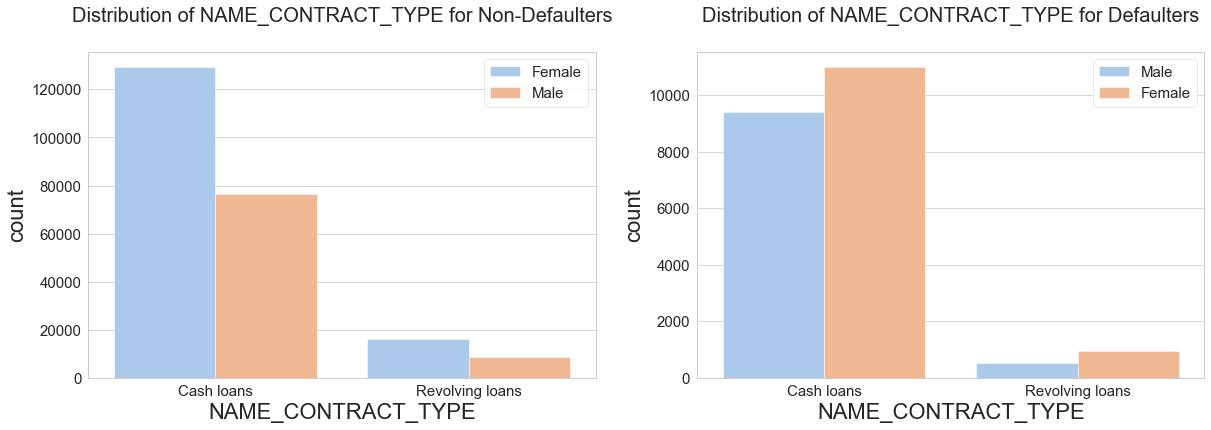

In [109]:
# Plotting for Contract type

cnt_plot(col='NAME_CONTRACT_TYPE',hue='CODE_GENDER')

Points to be concluded from the above graph. (Target 0)

1. For contract type ‘cash loans’, counts are higher than ‘Revolving loans’ contract type.
2. For this also, Females are having more number than males.

Points to be concluded from the above graph. (Target 1)

1. For contract type ‘cash loans’ is having higher number of counts than ‘Revolving loans’ contract type.
2. For this also Female is leading for being a defaulter.

#### 5.1.3 Continuous Variables

In [110]:
# function to dist plot for continuous variables
def dist_plot(col):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=target0_app_data[col],ax=ax1)

    ax1.set_title(f'Distribution of {col} for Non-Defaulters',fontsize=20)
            
    sns.distplot(a=target1_app_data[col],ax=ax2)
    ax2.set_title(f'Distribution of {col} for Defaulters',fontsize=20)    
        
    plt.show()

#### Amt_Credit

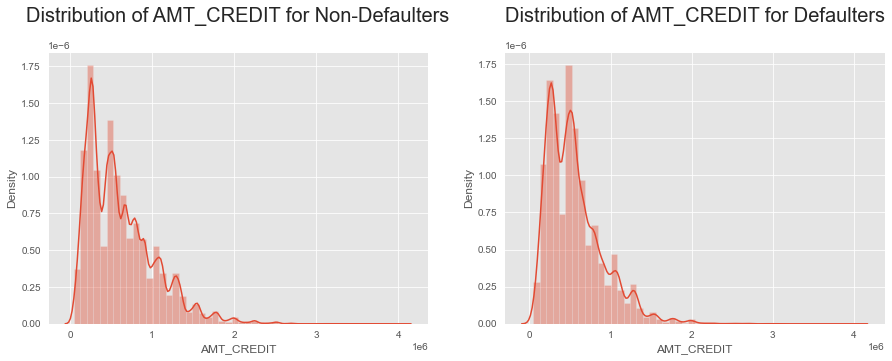

In [112]:
dist_plot('AMT_CREDIT')

As we can see from the graphs, the distribution is almost same for both defaulters and non-defaulters, so we cannot get much insights from this factor.

In [113]:
# function to plot histogram

def plot_hist(col,r):
    plt.figure(figsize = (20,6))
    
    plt.subplot(1,2,1)
    target0_app_data[col].plot.hist()
    plt.title('Non-Defaulters ({}) Distribution'.format(col), fontsize = 20)
    plt.yticks(size = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(rotation = r,fontsize = 15)
    
    plt.subplot(1,2,2)
    target1_app_data[col].plot.hist()
    plt.title('Defaulters ({}) Distribution'.format(col), fontsize = 20)
    plt.yticks(size = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(rotation = r,fontsize = 15)
    
    plt.show()

#### Amt_Credit

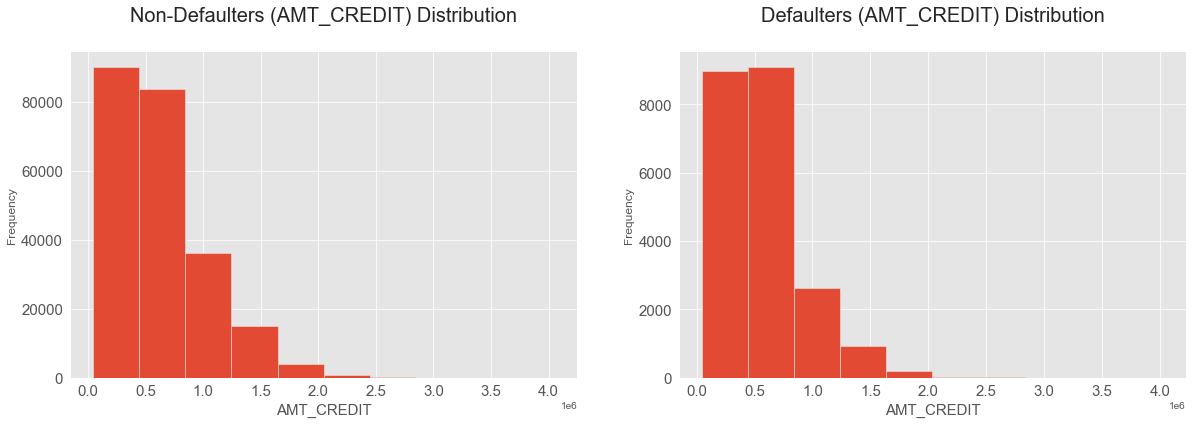

In [114]:
plot_hist('AMT_CREDIT', 0)

Observations from the above plot:
1. AMT_CREDIT Defaults is highest for the 500000-1000000 range
2. AMT_CREDIT for non-defaulters is highest for range 0 to 500000. 
3. Chances of people with credit range of 0 to 500000 is more for being a nn-defaulter

#### Amt_Annuity

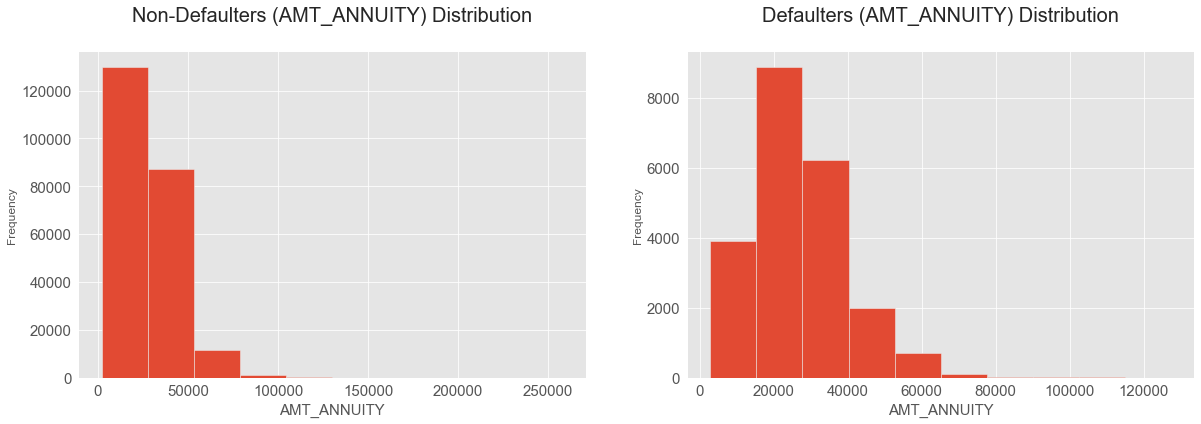

In [115]:
plot_hist('AMT_ANNUITY', 0)

Observations from the above plot:
1. AMT_ANNUITY range of 0 to 50000 have highest frequency ( > 120000) of people in non-defaulter's data.

#### Amt_Goods_Price

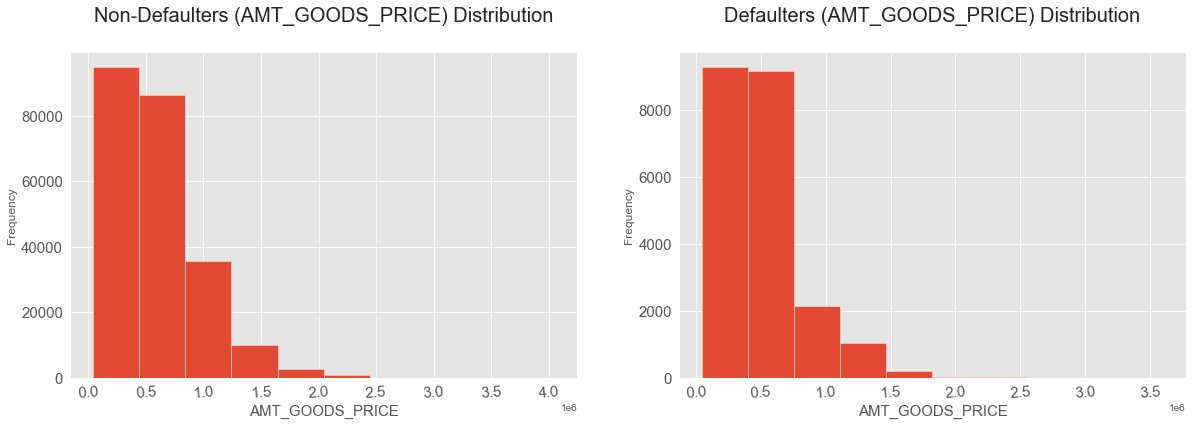

In [116]:
plot_hist('AMT_GOODS_PRICE', 5)

Observations from the above plot:
1. AMT_GOODS_PRICE for Defaulters peaks for the range[ 0 - 500,000 ].But for Defaulters it peaks from [20,000 - 30,000].

In [117]:
# function to plot histogram

def hist_plot(col, b):
    plt.figure(figsize=(17,5))

    plt.subplot(1, 2, 1)
    target0_app_data[col].plot.hist(bins=range(b))
    plt.title(f'Distribution of {col} for Non-Defaulters',fontsize=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.xlabel(f'{col}',fontsize=15)
    #plt.ylabel('LOAN APPLICATION COUNT')

    plt.subplot(1, 2, 2)
    target1_app_data[col].plot.hist(bins=range(b))
    plt.title(f'Distribution of {col} for Defaulters',fontsize=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.xlabel(f'{col}',fontsize=15)
    #plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

#### Cnt_Fam_Members

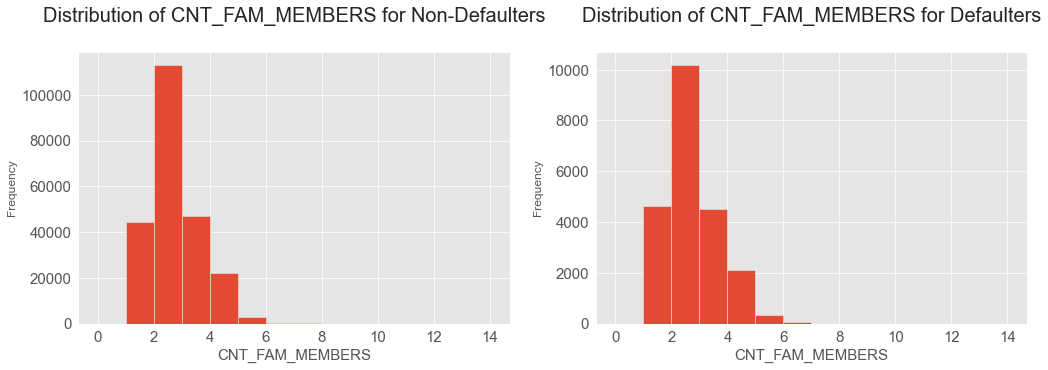

In [118]:
hist_plot('CNT_FAM_MEMBERS', 15)

We can see that a family of 3 applies loan more often than the other families.

### 5.2 Bivariate analysis of Target 0 and Target 1

#### 5.2.1 Numerical Variables

#### Name_Education_Type V/S Amt_Credit

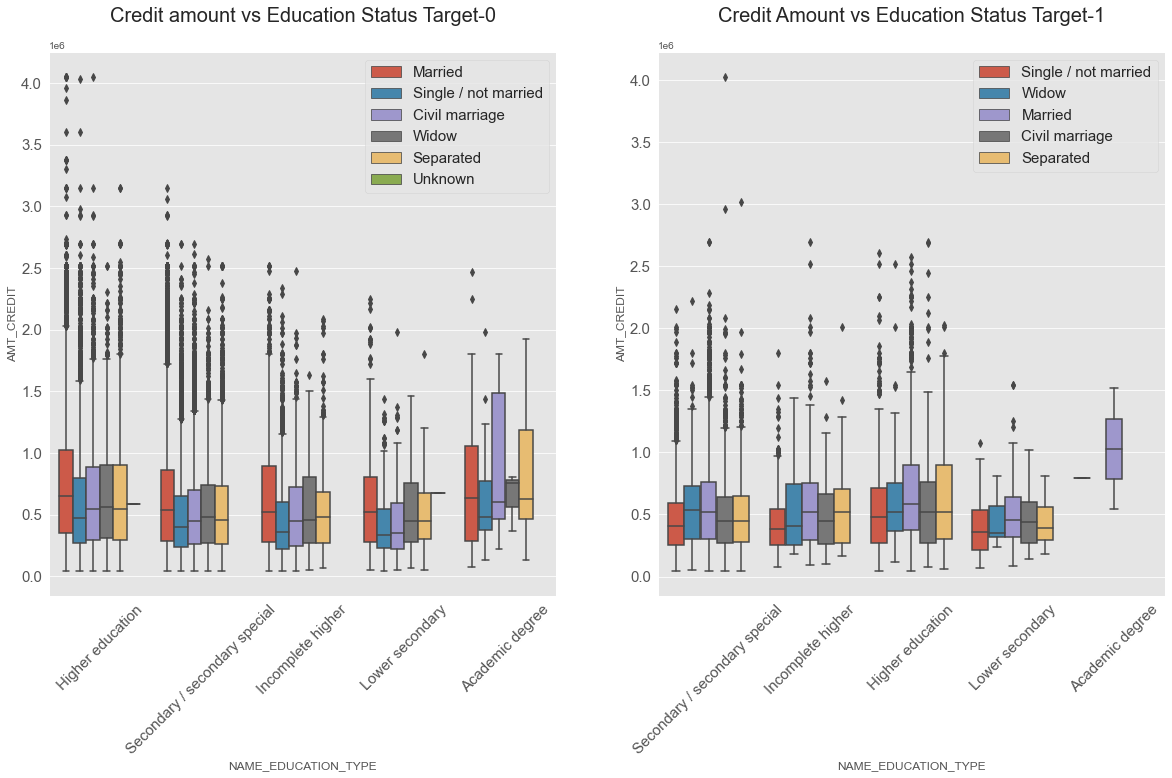

In [119]:
# Box plotting for credit amount

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
sns.boxplot(data =target0_app_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status Target-0', fontsize = 20)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
sns.boxplot(data =target1_app_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status Target-1', fontsize = 20)
plt.legend(fontsize=15)

plt.show()

From the above box plot we can say that: 
For non-defaulters
1. Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others for non-defaulters.
2. Most of the outliers are from Education type 'Higher education' and 'Secondary' for target-0 data i.e for non-defaulters. 
3. Civil marriage for Academic degree is having most of the credits in the third quartile.
4. We can say, single/not married people are always having less credit amount as compared to other categories.

For defaulters, 
1. Academic degree have high credit for married people.
2. As compared to non-defaulters, defaulter data has less outliers specially for Higher and secondary education type.

Common Inference:
1. We can say, single/not married people are always having less credit amount as compared to other categories.
2. Those with higher education have higher credits and are more likely to make payments on time.
3. For non-defaulters as well as defaulters data, more outliers are present in Higher education and Secondary education type.
4. The people with secondary and secndary special education are less likely to make payments on time.

#### Name_Education_Type V/S Amt_Income_Total

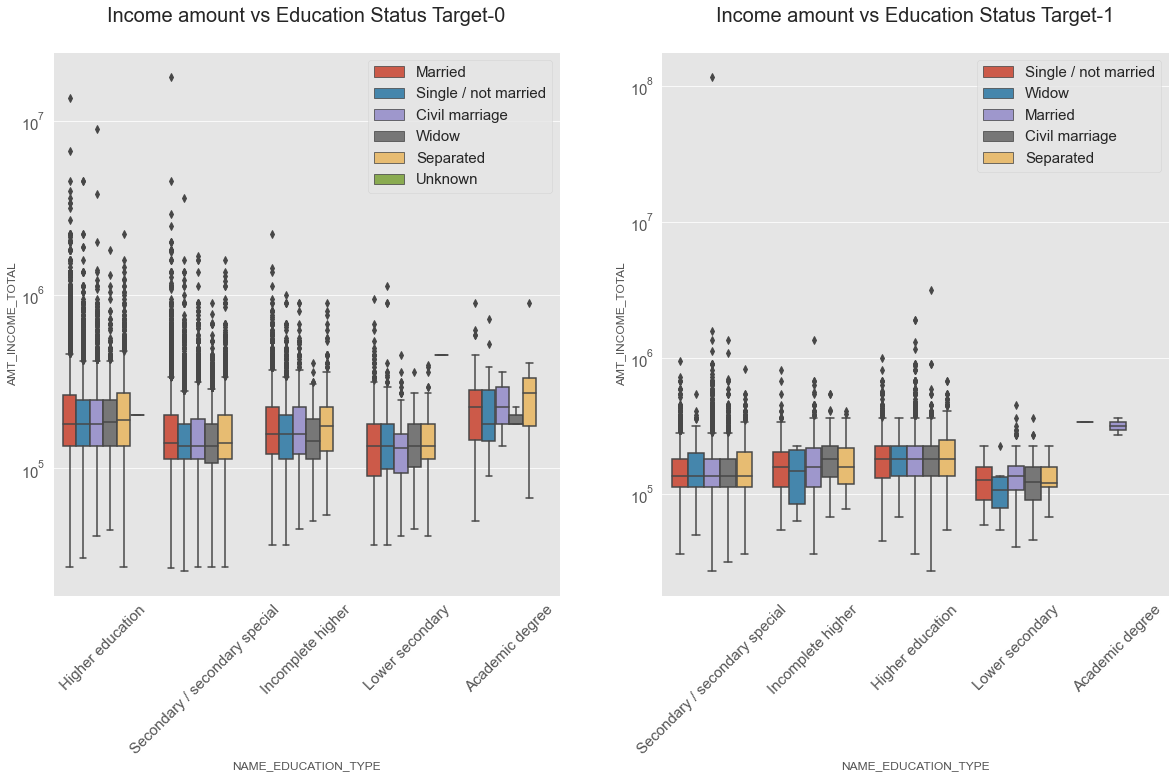

In [121]:
# Box plotting for Income amount


plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
plt.yscale('log')
sns.boxplot(data =target0_app_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status Target-0', fontsize = 20)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
plt.yscale('log')
sns.boxplot(data =target1_app_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status Target-1', fontsize = 20)
plt.legend(fontsize=15)

plt.show()

From above boxplot for Education type:
1. 'Higher education' the median of income amount is mostly equal for all family status. 
2. Academic degree education type is having less outliers in data as compared to others for target 0 and 1 both. But their income amount is little higher that Higher education.
3. Lower secondary are have less income amount than others.

Common Inference:
1. Those with higher education have higher income and are more likely to make payments on time.
2. For non-defaulters as well as defaulters data, more outliers are present in Higher education type.
3. People with less income amount tend to be defaulters.

#### 5.2.2 Continuous Variables

In [122]:
# function for scatter plot for continuous variables
def scatter_plot(col1, col2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=col1, y=col2,data=target0_app_data,ax=ax1)
    ax1.set_xlabel(col1)    
    ax1.set_ylabel(col2)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    ax1.set_title(f'{col1} vs {col2} for Non-Defaulters',fontsize=20)
    
    sns.scatterplot(x=col1, y=col2,data=target1_app_data,ax=ax2)
    ax2.set_xlabel(col1)    
    ax2.set_ylabel(col2)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    ax2.set_title(f'{col1} vs {col2} for Defaulters',fontsize=20)
            
    plt.show()

#### Amt_Goods_Price V/S Amt_Credit

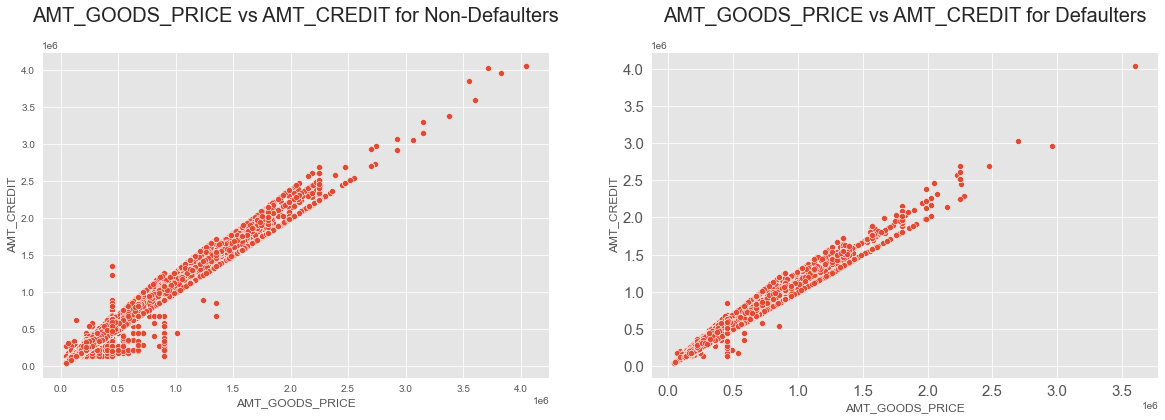

In [123]:
scatter_plot('AMT_GOODS_PRICE', 'AMT_CREDIT')

As we can see from the plot,

1. Goods Price and Credits have a somewhat linear relationship. As the Good Price is increasing the corresponding credits also increases.
2. Defaults are relatively less for the values less than 500,000 for 'AMT_CREDIT' and 1,000,000 for 'AMT_GOODS_PRICE'
3. This increase in credits is more in case of non-defaulters data, as on time payments increases the credits.
4. People with loans for higher goods price and have made their payments on time thus they have higher credits.
5. Wheras credits are not very high for those with higher goods price but didnt pay loan or they are defaulters.

#### Amt_Annuity V/S Amt_Credit

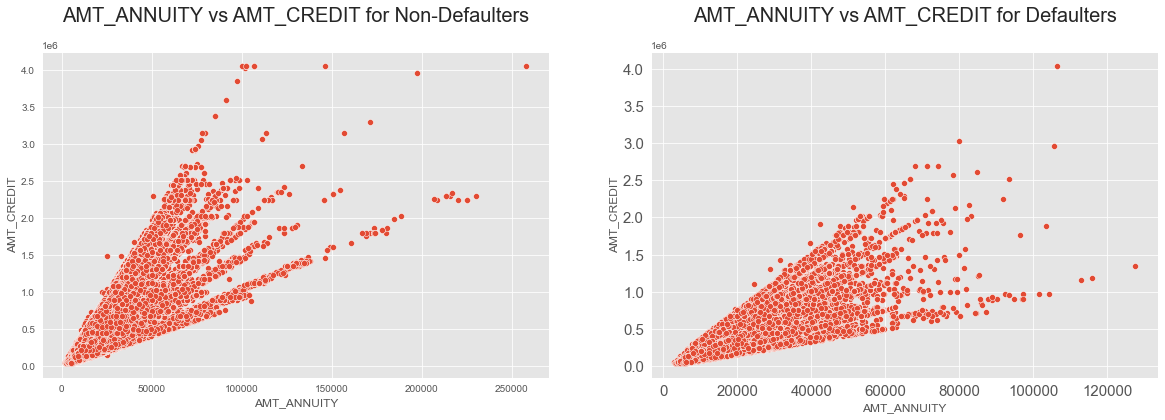

In [124]:
scatter_plot('AMT_ANNUITY', 'AMT_CREDIT')

Inference: As we can see from the graphs, the distribution is almost same for both defaulters and non-defaulters, so we cannot get much insights from this factor.

### 5.3 Multivariate Analysis

#### 'Amt_Credit', 'Amt_Income_Total', 'Cnt_Fam_Members'

#### For Target 0

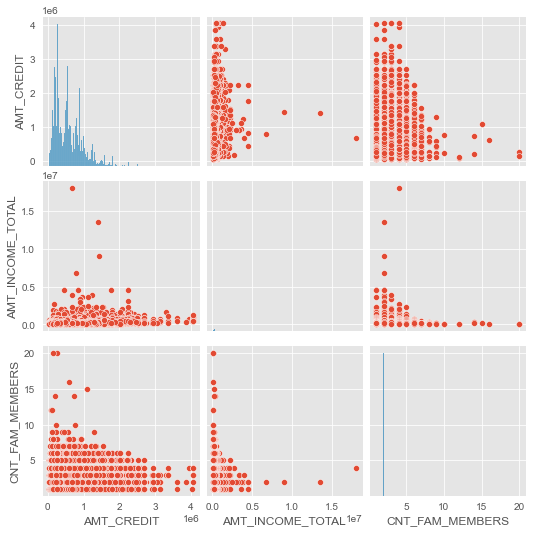

In [125]:
# Pairplot for multivariate analysis
sns.pairplot(data= target0_app_data , vars = ['AMT_CREDIT','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Inferences:
We can see from above plot for non-defaulter's data that, For people with low or medium income and less family members more likely to pay amount on time and thus have high credits.
We can observe that larger families and people with larger AMT_CREDIT default less often

#### For Target 1

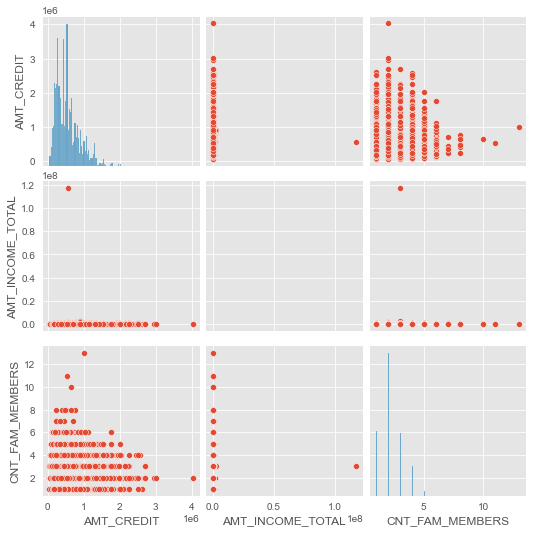

In [126]:
# Pairplot code
sns.pairplot(data= target1_app_data , vars = ['AMT_CREDIT','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Inferences:
We can see from above plot for defaulter's data that, For people with very low or low income tends to have less credits as compared to non-defaulter's data irrespective of the total family members count.
From the above plot we can say that, The people are equally likely to default if the family is small and the AMT_CREDIT is low, considering the imcome is low. 
This can happen if the people were unable to pay the amount on time resulting in low credits or if the customers haven't paid the amount.

Based on the above analysis, we have identified below columns which can be useful in finding our final insights.

AGE_GROUP, CODE_GENDER, INCOME_RANGE, NAME_FAMILY_STATUS, EDUCATION_TYPE, CONTRACT_TYPE

## 6. Finding correlations among the columns

### 6.1 Top 10 correlations in the 'TARGET 0' ( Non-Defaulters) data

In [127]:
ad_numbers_0 = target0_app_data.select_dtypes('number')
ad_numbers_0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,169,1186,291,2.0,11,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,32,4260,2531,1.0,9,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,434,9833,2437,2.0,17,0.650442,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,NaN,52
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,434,4311,3458,1.0,11,0.322738,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,226,4970,477,2.0,16,0.354225,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,11870,57,675,3936,1.0,11,0.501221,9.0,3.0,9.0,2.0,2315.0,0.0,0.0,0.0,1.0,0.0,2.0,32
307504,456248,0,0,153000.0,331920.0,16096.5,225000.0,0.022625,16705,1036,9798,259,1.0,11,0.530725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,45
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,33,8456,1982,1.0,15,0.681632,0.0,0.0,0.0,0.0,273.0,0.0,0.0,0.0,0.0,0.0,NaN,25
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,1131,6737,5150,1.0,9,0.535722,6.0,0.0,6.0,0.0,1909.0,1.0,0.0,0.0,1.0,0.0,1.0,40


In [128]:
# Creating a seperate dataframe for Non-Defaulters of dtype : numbers (int,float) as correlations can only be with numeric columns,
# and finding the top 10 Correlations.

target0_numeric = target0_app_data.select_dtypes('number')

# Correlations of Non-Defaulters
target0_numeric_corr = round(target0_numeric.corr(),3)

# Finding the top 10 Correlation for Non-Defaulters
target0_corr_pairs = target0_numeric_corr.unstack()
target0_top10_corr = target0_corr_pairs.sort_values(ascending = False).drop_duplicates().head(10)
target0_top10_corr

AGE                       AGE                         1.000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998
AMT_GOODS_PRICE           AMT_CREDIT                  0.986
CNT_FAM_MEMBERS           CNT_CHILDREN                0.893
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.861
AMT_GOODS_PRICE           AMT_ANNUITY                 0.767
AMT_CREDIT                AMT_ANNUITY                 0.762
AMT_ANNUITY               AMT_INCOME_TOTAL            0.401
DAYS_BIRTH                WEEKS_EMPLOYED              0.353
AGE                       WEEKS_EMPLOYED              0.352
dtype: float64

In [129]:
target0_corr_10_list = target0_numeric[['AGE','OBS_60_CNT_SOCIAL_CIRCLE',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'AMT_CREDIT',
                  'CNT_FAM_MEMBERS',
                  'CNT_CHILDREN',
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'AMT_ANNUITY',
                  'AMT_INCOME_TOTAL','WEEKS_EMPLOYED']].corr()[:10]

In [130]:
target0_corr_10_list.columns

Index(['AGE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_CREDIT', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY',
       'AMT_INCOME_TOTAL', 'WEEKS_EMPLOYED'],
      dtype='object')

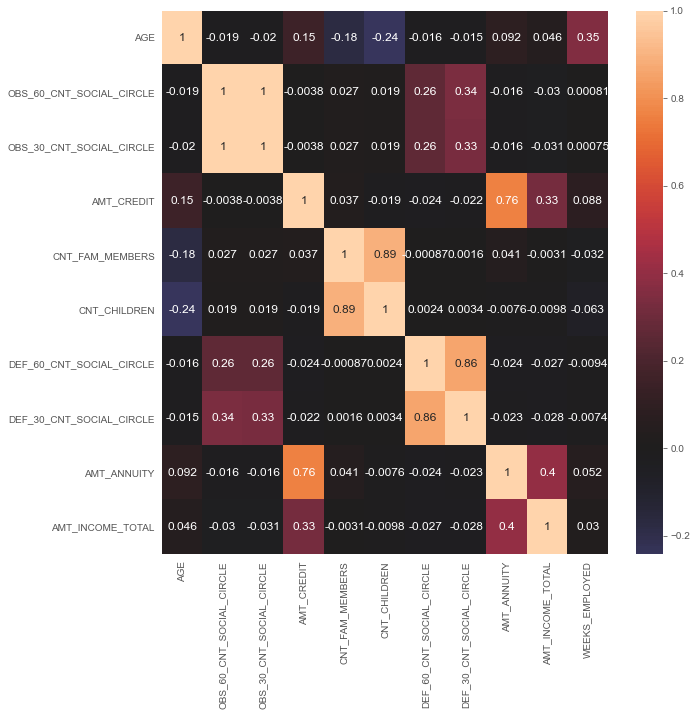

In [131]:
plt.figure(figsize=(10,10))
sns.heatmap(target0_corr_10_list,annot = True, annot_kws={'size': 12}, center = 0)
plt.show()

1. Columns like 'AGE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_CREDIT' are highly correlated. Positive correlation indicates that if one variable changes, then other will also change in the same way.

2. There is negative correlation between 'Amt_Annuity' & 'OBS_60_CNT_SOCIAL_CIRCLE', which means that they are inversely proportional to each other.

### 6.2 Top 10 correlations in the 'TARGET 1' ( Defaulters) data

In [132]:
# Creating a seperate dataframe for Non-Defaulters of dtype : numbers (int,float) as correlations can only be with numeric columns,
# and finding the top 10 Correlations.

target1_numeric = target1_app_data.select_dtypes('number')

# Correlations of Non-Defaulters
target1_numeric_corr = round(target1_numeric.corr(),3)

# Finding the top 10 Correlation for Non-Defaulters
target1_corr_pairs = target1_numeric_corr.unstack()
target1_top10_corr = target1_corr_pairs.sort_values(ascending = False).drop_duplicates().head(10)
target1_top10_corr

AGE                       AGE                         1.000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998
AMT_CREDIT                AMT_GOODS_PRICE             0.982
CNT_CHILDREN              CNT_FAM_MEMBERS             0.894
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.868
AMT_ANNUITY               AMT_CREDIT                  0.749
DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.332
OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.328
DAYS_BIRTH                WEEKS_EMPLOYED              0.307
DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.258
dtype: float64

In [133]:
target1_corr_10_list = target1_numeric[['AGE','OBS_60_CNT_SOCIAL_CIRCLE',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'AMT_CREDIT',
                  'CNT_FAM_MEMBERS',
                  'CNT_CHILDREN',
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'AMT_ANNUITY',
                  'AMT_INCOME_TOTAL','WEEKS_EMPLOYED']].corr()[:10]

In [134]:
target1_corr_10_list.columns

Index(['AGE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_CREDIT', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY',
       'AMT_INCOME_TOTAL', 'WEEKS_EMPLOYED'],
      dtype='object')

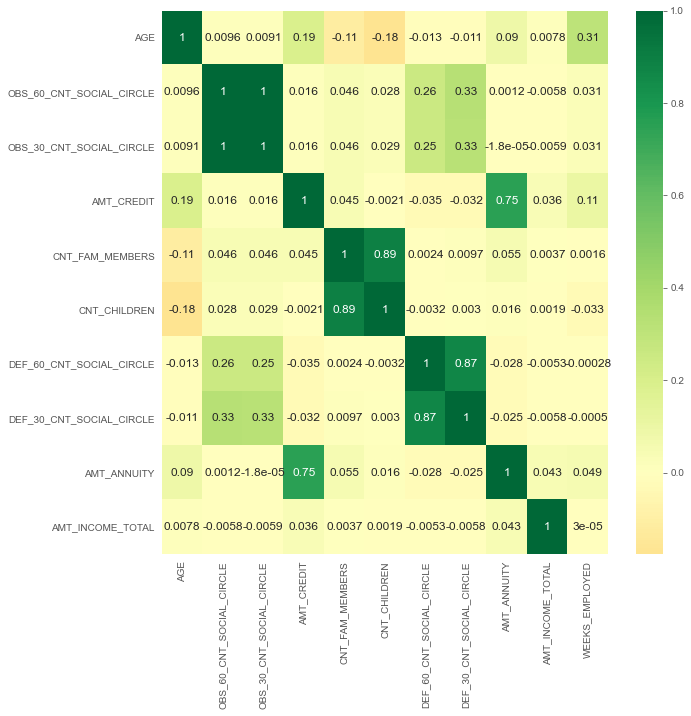

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(target1_corr_10_list,annot = True, annot_kws={'size': 12}, center = 0, cmap="RdYlGn")
plt.show()

1. Columns like 'AGE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_CREDIT' are highly correlated. Positive correlation indicates that if one variable changes, then other will also change in the same way.

2. There is negative correlation between 'Amt_Income_Total' & 'OBS_60_CNT_SOCIAL_CIRCLE', which means that they are inversely proportional to each other.

So the variables correlated in target_0 dataframe and target_1 dataframe are same with slightly varying correlation values.

In [136]:
#For further analysis
#checking final columns in app_data
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'WEEKS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_

In [137]:
#checking app_data shape
app_data.shape

(252137, 50)

In [138]:
#assigning all columns to a variable
f= ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'WEEKS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_RANGE', 'CREDIT_RANGE', 'AGE',
       'AGE_GROUP', 'ANNUITY_RANGE']

In [139]:
#copying app_data to a new dataframe 'new_app_data'
#will be used for further analysis
new_app_data=app_data[f]
new_app_data.shape

(252137, 49)

In [140]:
#exporting the new_app_data to a csv file 'New_Data'
#new_app_data.to_csv('C:/Users/hp/Downloads/New_Data.csv')
new_app_data.to_csv('New_Data.csv')

## Case study will be continued in another Notebook named "EDA Group Case_Study_Contd.."